In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [6]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [0]:
# criado df a partir do arquivo csv
df = pd.read_csv('comp_bikes_mod.csv')

In [0]:
# criando df sem os linhas com o dteady nulo
df1 = df.dropna(subset=['dteday'])

             season      temp     atemp       hum  windspeed       cnt
season     1.000000  0.311273  0.319559  0.146984  -0.149802  0.179190
temp       0.311273  1.000000  0.988102 -0.069887  -0.016022  0.405867
atemp      0.319559  0.988102  1.000000 -0.054224  -0.058803  0.403810
hum        0.146984 -0.069887 -0.054224  1.000000  -0.289859 -0.323409
windspeed -0.149802 -0.016022 -0.058803 -0.289859   1.000000  0.091747
cnt        0.179190  0.405867  0.403810 -0.323409   0.091747  1.000000


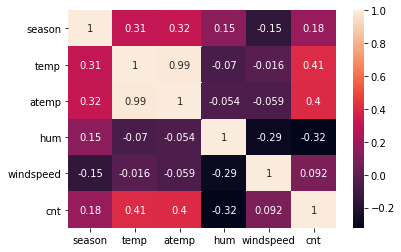

In [9]:
# matriz de correlação
print(df1[["season", "temp", "atemp", "hum", "windspeed", "cnt"]].corr())

# plot da matrix de correlação
corr = df1[["season", "temp", "atemp", "hum", "windspeed", "cnt"]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) 
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


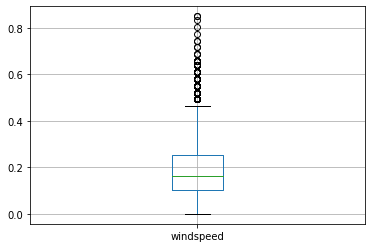

In [0]:
# plot do boxplot para a variavel windsspeed
df1[['windspeed']].boxplot()

In [11]:
# Calculo da proporção (em %) de valores nulos existente na coluna "temp"
temp_na = (df.temp.isna().sum()) / ((df.temp.count()) + (df.temp.isna().sum()))
print(temp_na)

0.10000575407100523


In [0]:
# valor médio para coluna temp
df1.temp.mean()

0.4969259206597582

In [0]:
# desvio padrão para a coluna windspeed
df1.windspeed.std()

0.12230930508286268

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [13]:
# conversão da coluna dteday para datetime
df1['dteday'] = df1.loc[:,'dteday'].apply(pd.to_datetime)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# converter a coluna season para categorico
df1['season'] = df1.season.astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# preparando os dados para aplicar a regressão
df2 = df1.dropna(subset=['temp'])
df2 = df2.dropna(subset = ['cnt'])
df2.isnull().sum()

instant       1269
dteday           0
season        1252
yr            1248
mnth          1282
hr            1280
holiday       1262
weekday       1235
workingday    1216
weathersit    1261
temp             0
atemp         1235
hum           1246
windspeed     1246
casual        1266
registered    1240
cnt              0
dtype: int64

In [16]:
# Aplicando Regressão Linear

x = df2['temp'].values  #variável independente 
Y = df2['cnt'].values #variável dependente 

#Realiza a construção do modelo de regressão
reg = LinearRegression()
x_Reshaped = x.reshape(-1, 1) #coloca os dados no formato 2D
regressao = reg.fit (x_Reshaped,Y) # encontra os coeficientes (realiza a regressão)

#realiza a previsão
previsao = reg.predict(x_Reshaped)

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print(R_2)

0.16472790394705883


In [17]:
# Aplicando Arvores de Descisão

reg = DecisionTreeRegressor()
x_Reshaped = x.reshape(-1, 1) #coloca os dados no formato 2D
regressao = reg.fit (x_Reshaped,Y) # encontra os coeficientes (realiza a regressão)

#realiza a previsão
previsao = reg.predict(x_Reshaped)

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print(R_2)

0.17810244118086216


In [18]:
df2 = df1.dropna(subset=['hum'])
df2 = df2.dropna(subset = ['casual'])
df2 = df2.dropna(subset = ['cnt'])
df2.isnull().sum()

instant       1145
dteday           0
season        1136
yr            1162
mnth          1136
hr            1153
holiday       1106
weekday       1105
workingday    1119
weathersit    1145
temp          1146
atemp         1128
hum              0
windspeed     1147
casual           0
registered    1103
cnt              0
dtype: int64

In [30]:
# preparando os dados, colocando o valor medio do atributo nos valores NA
df.update(df['hum'].fillna(df['hum'].mean()))
df.update(df['cnt'].fillna(df['cnt'].mean()))
df.update(df['casual'].fillna(df['casual'].mean()))

# Aplicando Regressão Linear

x = df[['hum', 'casual']].values  #variável independente 
Y = df['cnt'].values #variável dependente 

#Realiza a construção do modelo de regressão
reg = LinearRegression()
regressao = reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)

#realiza a previsão
previsao = reg.predict(x_Reshaped)

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print(R_2)

0.40561165206692495


In [29]:
# arvore de descisão como regressor

x = df[['hum', 'casual']].values  #variável independente 
Y = df['cnt'].values #variável dependente 

reg = DecisionTreeRegressor()
regressao = reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)

#realiza a previsão
previsao = reg.predict(x)

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print(R_2)

0.6973174287156154
